In [55]:
import os
import sys
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib.transforms import Bbox
from utils.log import load_from_json

BASELINE = os.path.dirname(os.getcwd())

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from segformer_segmentation_head_study import plot_segmentation_head
from mIoU_vs_models import plot_mIoU_vs_models, plot_sample_images, crop_image
from epoch_time_vs_params import plot_epoch_time
from utils.vis_utils import visualize_grid, plot_pil_images

# Segformer head comparison

0.567 (1x1 conv), 0.566 (double 3x3), 0.571 (3x3 conv)


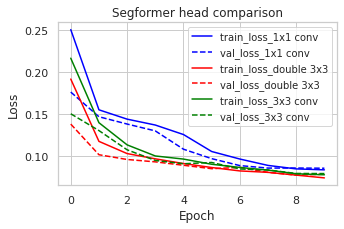

In [7]:
plot_segmentation_head()

# mIoU vs models

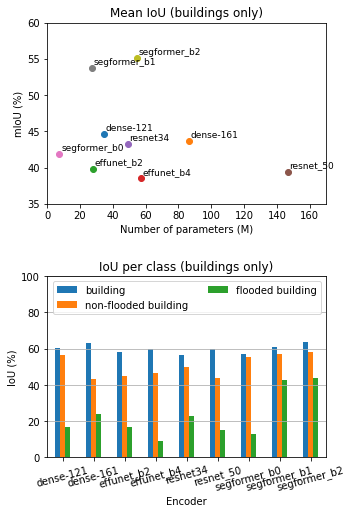

In [48]:
result, sample_foundation_images, sample_flood_images = plot_mIoU_vs_models()

Show flood predictions:

In [51]:
sample_flood_images['resnet34'][0]

'/tmp/share/runs/spacenet8/nenad/2023-06-06-07-52_resnet34/flood/pngs/10300100AF395C00_2_16_51_pred.png'

Saved to /tmp/share/repos/nenad/baseline/results/sample_images_flood_0.png


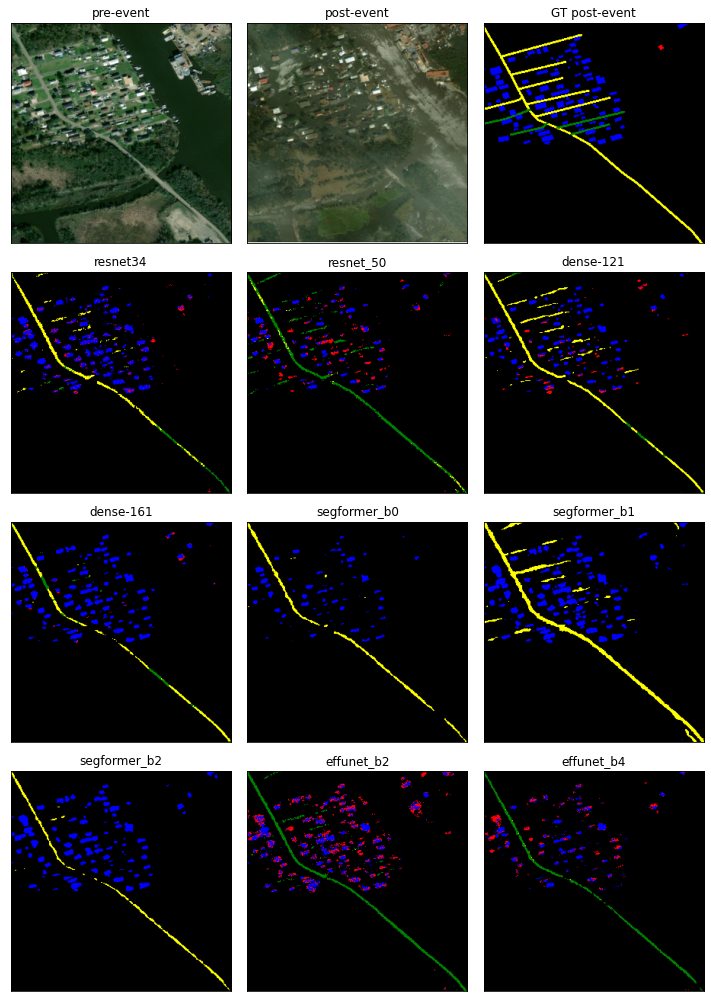

Saved to /tmp/share/repos/nenad/baseline/results/sample_images_flood_1.png


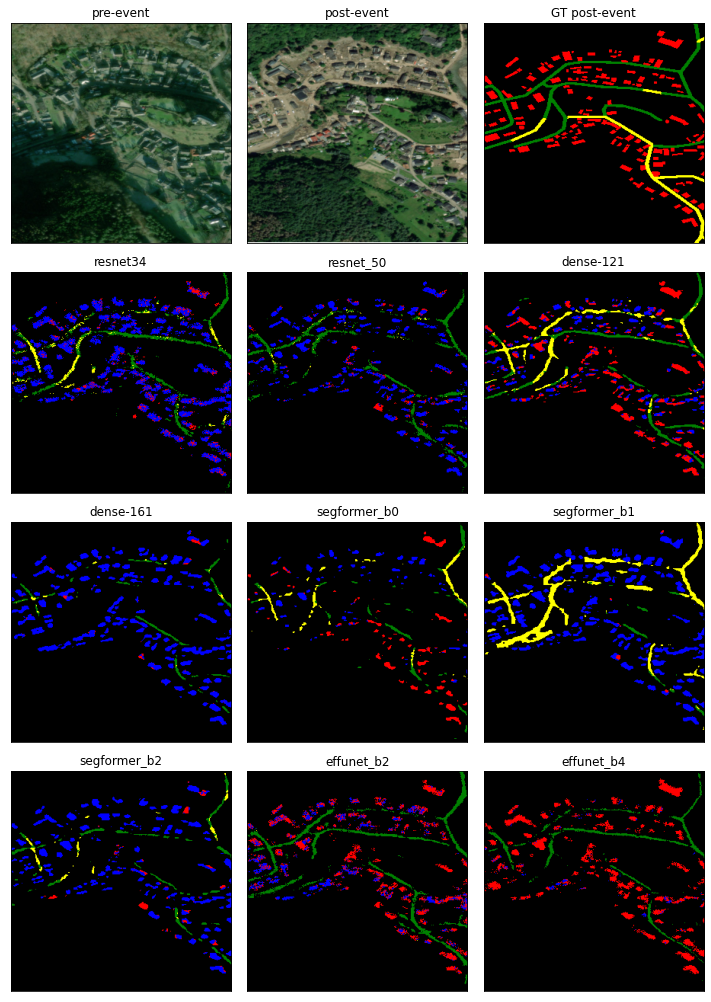

Saved to /tmp/share/repos/nenad/baseline/results/sample_images_flood_2.png


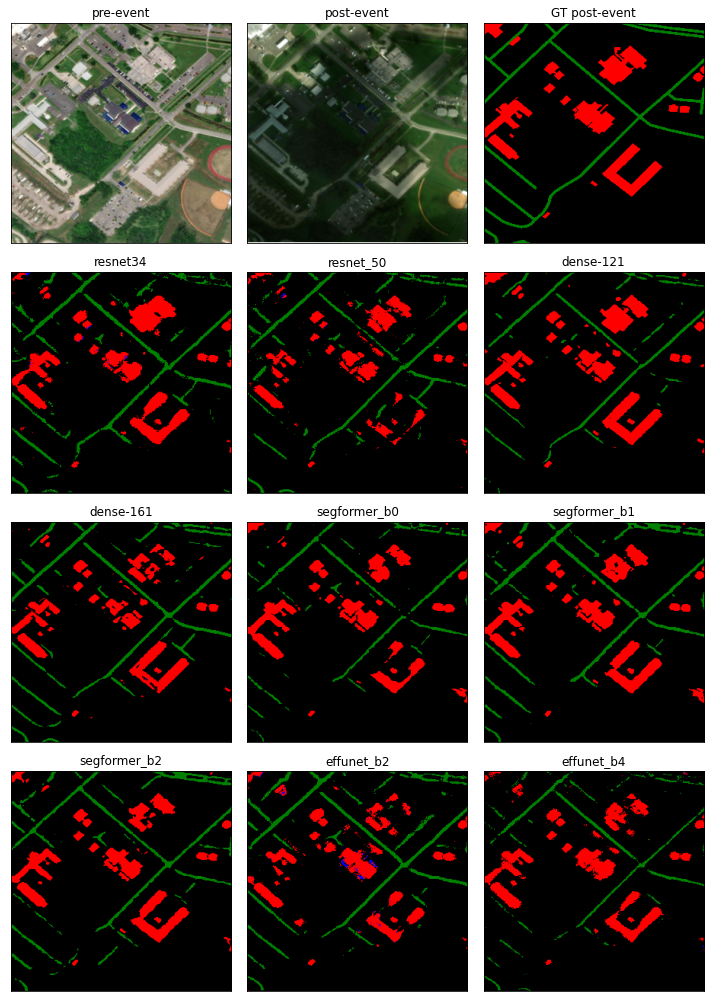

In [55]:
for i in range(3):
    # crop images
    foundation = crop_image(sample_flood_images['resnet34'][i], (144, 92))
    flood = crop_image(sample_flood_images['resnet34'][i], (144, 387))
    gt_flood = crop_image(sample_flood_images['resnet34'][i], (440, 93))
    images = {}
    for key in sample_flood_images.keys():
        images[key] = crop_image(sample_flood_images[key][i], (732, 94)) 
        
    # show them in a grid
    limages = [foundation, flood, gt_flood] + [images[key] for key in images]
    ltitles = ['pre-event', 'post-event', 'GT post-event'] + list(images.keys())
    plot_pil_images(limages, ltitles, 3, figsize=(10,14), save_path=os.path.join(BASELINE, f'results/sample_images_flood_{i}.png'))

Show foundation predictions:

Saved to /tmp/share/repos/nenad/baseline/results/sample_images_foundation_0.png


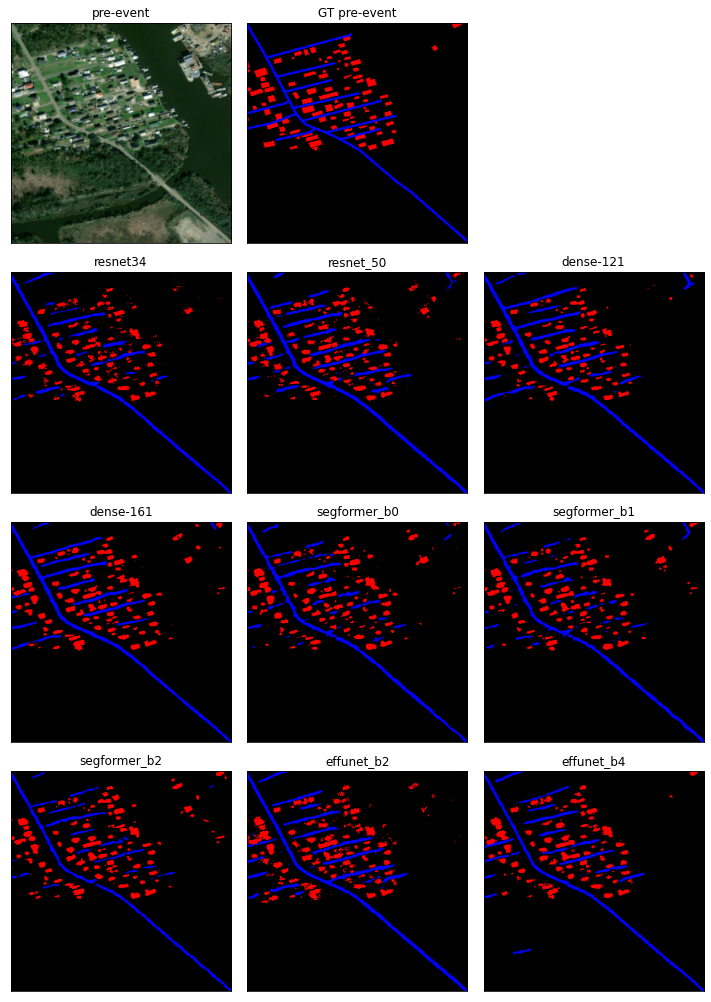

Saved to /tmp/share/repos/nenad/baseline/results/sample_images_foundation_1.png


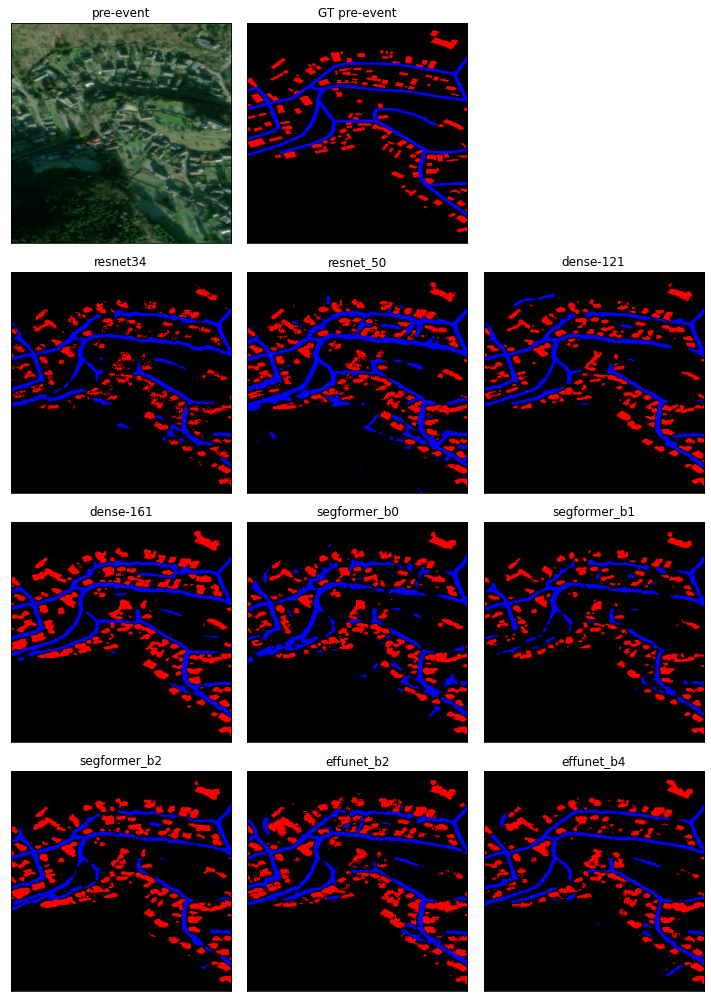

Saved to /tmp/share/repos/nenad/baseline/results/sample_images_foundation_2.png


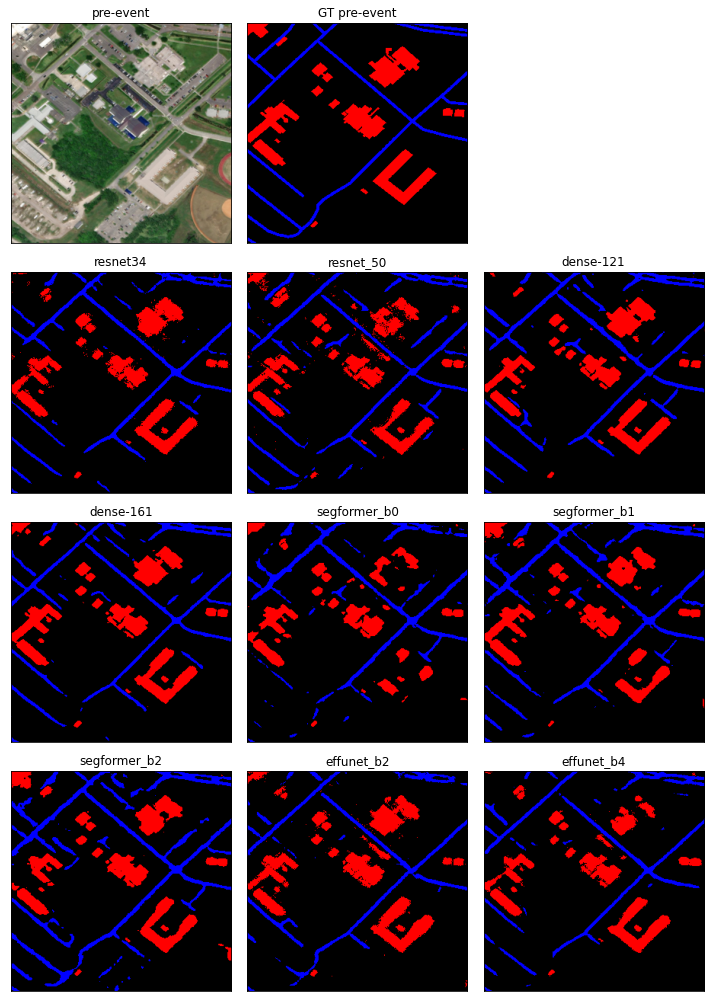

In [56]:
for i in range(3):
    # crop images
    foundation = crop_image(sample_foundation_images['resnet34'][i], (251, 50))
    gt_foundation = crop_image(sample_foundation_images['resnet34'][i], (561, 51))
    images = {}
    for key in sample_flood_images:
        images[key] = crop_image(sample_foundation_images[key][i], (872, 50)) 
        
    # show them in a grid
    limages = [foundation, gt_foundation, Image.new('RGB', (100, 100), color='white')] + [images[key] for key in images]
    ltitles = ['pre-event', 'GT pre-event', ''] + list(images.keys())
    plot_pil_images(limages, ltitles, 3, figsize=(10,14), save_path=os.path.join(BASELINE, f'results/sample_images_foundation_{i}.png'), remove=[2])

# Plot only raw data

Saved to /tmp/share/repos/nenad/baseline/results/data_sample.png


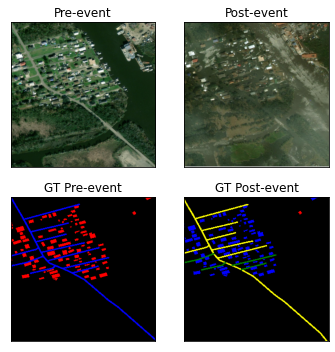

In [29]:
# plot_pil_images([foundation, flood, gt_foundation, gt_flood], titles=['foundation', 'flood', 'gt_foundation', 'gt_flood'], max_per_row=2)
plot_pil_images([foundation, flood, gt_foundation, gt_flood], titles=['Pre-event', 'Post-event', 'GT Pre-event', 'GT Post-event'], max_per_row=2, save_path=os.path.join(BASELINE, f'results/data_sample.png'))

# Plot best predictions 

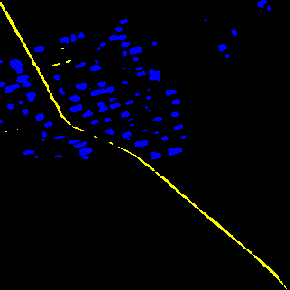

In [30]:

segformer_b2 = crop_image(sample_flood_images['segformer_b2'], (732, 94))
segformer_b2

# Epoch time

Created file.


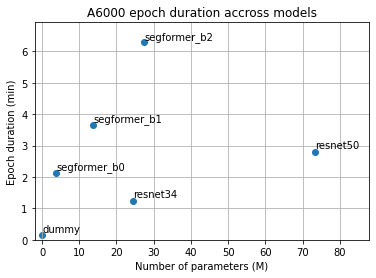

In [40]:
# plot_epoch_time('/tmp/share/runs/spacenet8/nenad/2023-06-07-21-47_epoch_time', label='epoch_time', tag='short')  # 
# plot_epoch_time('/tmp/share/runs/spacenet8/nenad/2023-06-05-18-49_epoch_time', label='3epochs')  # latest run: '/tmp/share/runs/spacenet8/nenad/2023-06-05-18-49_epoch_time_vs_param')  # 
plot_epoch_time()


# Comparison with Normalization

We load cache with normalization json and plot the same as plot_mIoU_vs_models:

In [4]:
from utils.log import load_from_json

In [5]:
cache = load_from_json('/Users/nenad.bozinovic/Work/SpaceNet8/repos/nenad/cache_w_normalization.json')
cache.pop('directory_counter')

In [45]:
l = ['dense_121', 'resnet50', 'resnet34', 'segformer_b0', 'segformer_b1']
m = {x + '_siamese': x for x in l}

building = {}
flooded_building = {}
non_flooded_building = {}  # key: {} for key in l}
d = {key:{} for key in l}
for key, value in cache.items():
    # foundation training
    if 'foundation eval' in value:
        row = value['foundation eval']
        model_name = row['model_name']
        d[model_name]['building'] = row['metrics_by_class']['building']['iou']
    if 'flood eval' in value:
        row = value['flood eval']
        model_name_siamese = row['model_name']
        model_name = m[model_name_siamese]
        d[model_name]['flooded building'] = row['metrics_by_class']['flooded building']['iou']
        d[model_name]['non-flooded building'] = row['metrics_by_class']['non-flooded building']['iou']
d
    

{'dense_121': {'building': 0.6157195075846811,
  'flooded building': 0.16053567192334955,
  'non-flooded building': 0.5102516067043712},
 'resnet50': {'building': 0.5866366467277615,
  'flooded building': 0.23680288678109396,
  'non-flooded building': 0.4740555059313277},
 'resnet34': {'building': 0.5813608443101888,
  'flooded building': 0.22802304670197399,
  'non-flooded building': 0.4691063054774531},
 'segformer_b0': {'building': 0.5643028331539601,
  'flooded building': 0.32423317249682376,
  'non-flooded building': 0.5188845949674705},
 'segformer_b1': {'building': 0.6217378199583049,
  'flooded building': 0.4312333963196757,
  'non-flooded building': 0.6006522468638831}}

In [52]:
df = pd.DataFrame(d).transpose()


In [53]:
df

,building,flooded building,non-flooded building
dense_121,0.615720,0.160536,0.510252
resnet50,0.586637,0.236803,0.474056
resnet34,0.581361,0.228023,0.469106
segformer_b0,0.564303,0.324233,0.518885
segformer_b1,0.621738,0.431233,0.600652


In [58]:
df.reset_index(inplace=True)

In [60]:
df.rename(columns={'index': 'model_name'}, inplace=True)

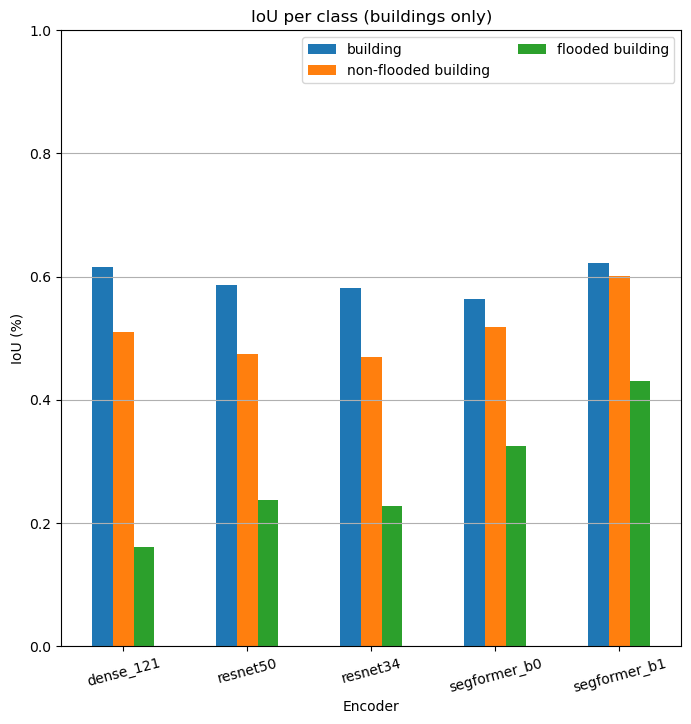

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    

df.plot(x='model_name', 
        y=['building', 'non-flooded building', 'flooded building'], 
        kind='bar', 
        ax=ax)
plt.xlabel('Encoder')
plt.ylabel('IoU (%)')
plt.title('IoU per class (buildings only)')
plt.ylim(0,1)
plt.legend(loc='upper right', ncol=2)
plt.xticks(rotation=15)
plt.grid(axis='y')
    
# plt.savefig(os.path.join(BASELINE, f'results/iou_vs_model.png'),
#             dpi=300)
#             # bbox_inches=Bbox.from_extents(-0.2, -0.2, 8, 4)
    
plt.show()
    